<h1> Break into Finance - Indeed & Python

## Introduction

### Libraries

In [ ]:
# Dataframes and data viz
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn

# Regex and string library
import re
import string

# Converting currencies
from currency_converter import CurrencyConverter

c = CurrencyConverter()

# Counting words, wordclouds and getting image
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator
import requests
from PIL import *

# NLP
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download("wordnet")
nltk.download("punkt")
nltk.download("stopwords")
enstop = stopwords.words("english")
frstop = stopwords.words("french")

### The data

In [7]:
# Getting the data
jobsUS = pd.read_excel("../indeed-finance/Data/octofinancejobsUS.xlsx")
jobsUK = pd.read_excel("../indeed-finance/Data/octofinancejobsUK.xlsx")
jobsCA = pd.read_excel("../indeed-finance/Data/octofinancejobsCA.xlsx")

In [8]:
# How many columns/rows
print(jobsUS.shape)
print(jobsUK.shape)
print(jobsCA.shape)

(978, 8)
(1498, 8)
(974, 8)


In [9]:
# A sample of the Canadian dataset
jobsCA.sample(5)

,Title,URL,Company,Company_Rating,Location,Summary,Date,Salary
466,Financial Analyst,https://ca.indeed.com/rc/clk?jk=6e07d7576153f7...,Cascades,3.2,"Candiac, QC",Bachelor's degree in finance or accounting;,25 days ago,NaN
527,Finance Director,https://ca.indeed.com/rc/clk?jk=53964ef6339f56...,NaN,NaN,"Campbell River, BC",The Director is accountable for ensuring the d...,17 days ago,NaN
248,Operations Finance Costing Analyst,https://ca.indeed.com/rc/clk?jk=51ae5326d806ac...,Collins Aerospace,3.7,"Oakville, ON",Minimum 3 years of financial analyst experienc...,30+ days ago,NaN
780,"CO-OP Student, Financial Systems Analyst",https://ca.indeed.com/rc/clk?jk=1d866b46745e74...,WorkSafeBC,3.9,"Richmond, BC",We are looking for a co-op student who will cl...,11 days ago,NaN
908,"Stagiaire, Solutions multi-classes d'actifs",https://ca.indeed.com/rc/clk?jk=5b86d3f400fe7e...,Fiera Capital,3.8,"Montréal, QC",Expérience préalable dans un poste lié à l'inv...,11 days ago,NaN


In [10]:
# Number of unique value in each column of each dataset
print(jobsUS.nunique())
print(jobsUK.nunique())
print(jobsCA.nunique())

Title             752
URL               978
Company           613
Company_Rating     33
Location          615
Summary           932
Date               30
Salary            115
dtype: int64
Title              991
URL               1498
Company            588
Company_Rating      32
Location           440
Summary           1423
Date                32
Salary             437
dtype: int64
Title             725
URL               974
Company           416
Company_Rating     26
Location          209
Summary           805
Date               30
Salary            186
dtype: int64


In [11]:
# Check duplicates
duprowsUS = jobsUS[jobsUS.duplicated()]
duprowsUK = jobsUK[jobsUK.duplicated()]
duprowsCA = jobsCA[jobsCA.duplicated()]
duprowsUS.name = "The US dataset"
duprowsUK.name = "The UK dataset"
duprowsCA.name = "The CA dataset"
dflist = [duprowsUS, duprowsUK, duprowsCA]
for df in dflist:
    if df.empty == True:
        print(df.name + " is empty")
    else:
        print(df.name + " is not empty")

The US dataset is empty
The UK dataset is empty
The CA dataset is empty


In [12]:
# Sum of NA
print(jobsUS.isnull().sum())
print(jobsUK.isnull().sum())
print(jobsCA.isnull().sum())

Title               0
URL                 0
Company           157
Company_Rating    157
Location            0
Summary            19
Date                0
Salary            852
dtype: int64
Title               0
URL                 0
Company           676
Company_Rating    676
Location          512
Summary            12
Date                0
Salary            702
dtype: int64
Title               0
URL                 0
Company           257
Company_Rating    257
Location            0
Summary            10
Date                0
Salary            748
dtype: int64


In [13]:
# Dropping rows without Company name
jobsUS = jobsUS.dropna(subset=["Company", "Company_Rating", "Location", "Summary"])
jobsUK = jobsUK.dropna(subset=["Company", "Company_Rating", "Location", "Summary"])
jobsCA = jobsCA.dropna(subset=["Company", "Company_Rating", "Location", "Summary"])

In [14]:
# Shape of each dataset
print(jobsUS.shape)
print(jobsUK.shape)
print(jobsCA.shape)

(807, 8)
(665, 8)
(711, 8)


The dataset is homogenous now, we have almost the same number of offers for each country.

In [15]:
# Number of NaN values in each dataset
print(jobsUS.isnull().sum())
print(jobsUK.isnull().sum())
print(jobsCA.isnull().sum())

Title               0
URL                 0
Company             0
Company_Rating      0
Location            0
Summary             0
Date                0
Salary            707
dtype: int64
Title               0
URL                 0
Company             0
Company_Rating      0
Location            0
Summary             0
Date                0
Salary            446
dtype: int64
Title               0
URL                 0
Company             0
Company_Rating      0
Location            0
Summary             0
Date                0
Salary            616
dtype: int64


In [16]:
# Concatenation of the 3 datasets
jobs = pd.concat([jobsUS, jobsUK, jobsCA])
jobs.shape

(2183, 8)

In [17]:
# Looking the timestamp of the offers
jobs.Date.unique()

array(['30+ days ago', '2 days ago', '26 days ago', '15 days ago',
       '9 days ago', '8 days ago', '20 days ago', '4 days ago',
       '1 day ago', '16 days ago', 'Today', '5 days ago', '29 days ago',
       '10 days ago', '25 days ago', '11 days ago', '19 days ago',
       '13 days ago', '24 days ago', '18 days ago', '17 days ago',
       '3 days ago', '12 days ago', '14 days ago', '23 days ago',
       '22 days ago', '7 days ago', '6 days ago', '27 days ago',
       '21 days ago', 'Just posted', '28 days ago'], dtype=object)

The offers go from 'Just posted' to '30+ days ago'.

## Pre analysis

### Locations

In [18]:
# Cleaning the location data
jobs.loc[jobs.Location.str.contains("London"), "Location"] = "London"
jobs.loc[jobs.Location.str.contains("New York"), "Location"] = "New York"
jobs.loc[jobs.Location.str.contains("Chicago"), "Location"] = "Chicago"
jobs.loc[jobs.Location.str.contains("Atlanta"), "Location"] = "Atlanta"
jobs.loc[jobs.Location.str.contains("Denver"), "Location"] = "Denver"
jobs.loc[jobs.Location.str.contains("Charleston"), "Location"] = "Charleston"
jobs.loc[jobs.Location.str.contains("Austin"), "Location"] = "Austin"
jobs.loc[jobs.Location.str.contains("Bellevue"), "Location"] = "Bellevue"
jobs.loc[jobs.Location.str.contains("Boston"), "Location"] = "Boston"
jobs.loc[jobs.Location.str.contains("Bristol "), "Location"] = "Bristol "
jobs.loc[jobs.Location.str.contains("Cambridge "), "Location"] = "Cambridge"
jobs.loc[jobs.Location.str.contains("Charlotte"), "Location"] = "Charlotte"
jobs.loc[jobs.Location.str.contains("Columbia"), "Location"] = "Columbia"
jobs.loc[jobs.Location.str.contains("Dallas"), "Location"] = "Dallas"
jobs.loc[jobs.Location.str.contains("Englewood "), "Location"] = "Englewood"
jobs.loc[jobs.Location.str.contains("Fort Lauderdale"), "Location"] = "Fort Lauderdale"
jobs.loc[jobs.Location.str.contains("Hemel Hempstead"), "Location"] = "Hemel Hempstead"
jobs.loc[jobs.Location.str.contains("Houston"), "Location"] = "Houston"
jobs.loc[jobs.Location.str.contains("Las Vegas"), "Location"] = "Las Vegas"
jobs.loc[jobs.Location.str.contains("Lexington"), "Location"] = "Lexington"
jobs.loc[jobs.Location.str.contains("Los Angeles"), "Location"] = "Los Angeles"
jobs.loc[jobs.Location.str.contains("Minneapolis"), "Location"] = "Minneapolis"
jobs.loc[jobs.Location.str.contains("Newcastle "), "Location"] = "Newcastle "
jobs.loc[jobs.Location.str.contains("Northampton "), "Location"] = "Northampton "
jobs.loc[jobs.Location.str.contains("Oklahoma City"), "Location"] = "Oklahoma City"
jobs.loc[jobs.Location.str.contains("Orlando"), "Location"] = "Orlando"
jobs.loc[jobs.Location.str.contains("Philadelphia"), "Location"] = "Philadelphia"
jobs.loc[jobs.Location.str.contains("Pittsburgh"), "Location"] = "Pittsburgh"
jobs.loc[jobs.Location.str.contains("San Francisco"), "Location"] = "San Francisco"
jobs.loc[jobs.Location.str.contains("Salt Lake City"), "Location"] = "Salt Lake City"
jobs.loc[jobs.Location.str.contains("Santa Monica"), "Location"] = "Santa Monica"
jobs.loc[jobs.Location.str.contains("Sunnyvale"), "Location"] = "Sunnyvale"
jobs.loc[jobs.Location.str.contains("West Hollywood"), "Location"] = "West Hollywood"

In [19]:
# Numbers of unique locations
jobs.Location.nunique()

820

In [20]:
# A function to distinguate the top 3 values of a column from the others
def bincolors(value, col):
    if value < col.nlargest(3).iloc[2]:
        return "black"
    else:
        return "grey"

In [21]:
# Jobs by location
jobs_bylocation = jobs.groupby(["Location"])["Title"].count().reset_index()
jobs_bylocation.columns = ["Location", "Number"]
jobs_bylocation.sort_values(by="Number", inplace=True, ascending=True)
jobs_bylocation["Colors"] = jobs_bylocation.Number.apply(
    lambda x: bincolors(x, jobs_bylocation.Number)
)
topjobs_bylocation = jobs_bylocation.tail(10)

In [97]:
# Locations chart
fig = px.bar(
    topjobs_bylocation,
    x="Number",
    y="Location",
    color_discrete_sequence=["black"],
    title="<b>Top 10 locations job offers<b>",
    orientation="h",
    text="Number",
    width=800,
    height=400,
)
# Remove x axes from the fig
fig.update_xaxes(visible=False, showticklabels=False)
fig.update_yaxes(
    tickfont_family="Charter", ticks="outside", tickcolor="white", ticklen=10
)
fig.update_traces(textposition="inside", textfont_size=11)

# Put the title in the middle
fig.update(layout=dict(title=dict(x=0.185, y=0.92)))
# Remove the legend and put the background in white
fig.update_layout(
    showlegend=False,
    plot_bgcolor="white",
    yaxis=dict(title=""),
    margin=dict(autoexpand=True, l=100, r=20, t=60, b=30),
    font=dict(family="Charter", size=13, color="Black"),
)
fig.show()

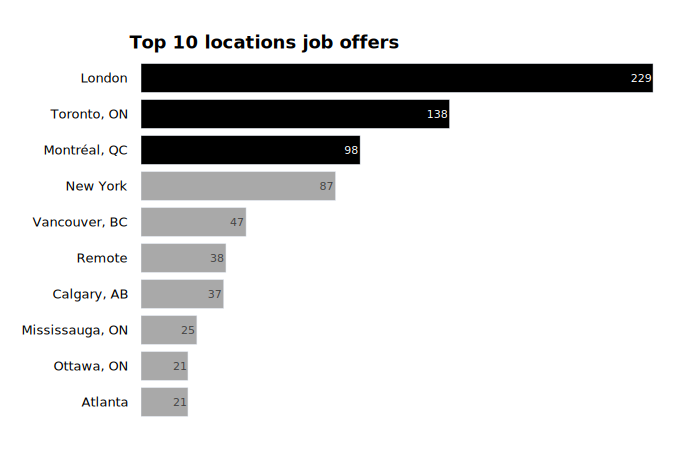

In [ ]:
#Locations chart with top 3 distincted
fig = px.bar(topjobs_bylocation, x="Number", y="Location",
            color='Colors', color_discrete_sequence=["darkgrey", "black"],
             title="<b>Top 10 locations job offers<b>", orientation='h',
             text='Number', width=800, height=400)
#Remove x axes from the fig
fig.update_xaxes(visible=False, showticklabels=False)
fig.update_yaxes(tickfont_family="Charter", ticks = "outside", tickcolor='white', ticklen=10)
fig.update_traces(textposition='inside', textfont_size=11)

#Put the title in the middle
fig.update(layout=dict(title=dict(x=0.185, y=0.92)))
#Remove the legend and put the background in white
fig.update_layout(showlegend=False, plot_bgcolor='white', yaxis=dict(title=''), margin=dict(autoexpand=True, l=100, r=20, t=60, b=30),
                  font=dict(family="Charter", size=13,color="Black"))
fig.show()

### Companies

In [23]:
# Number of unique company in the dataset
jobs.Company.nunique()

1410

In [24]:
# Unique company in the dataset
jobs.Company.unique()

array(['Citi', 'Morgan Stanley', 'Pacific Life', ..., 'AAR Financial',
       'Woodlands Head Office', 'East West College'], dtype=object)

In [25]:
# Jobs by company
jobs_bycompany = jobs.groupby(["Company"])["Title"].count().reset_index()
jobs_bycompany.columns = ["Company", "Number"]
jobs_bycompany.sort_values(by="Number", inplace=True, ascending=True)
jobs_bycompany["Colors"] = jobs_bycompany.Number.apply(
    lambda x: bincolors(x, jobs_bycompany.Number)
)
topjobs_bycompany = jobs_bycompany.tail(10)

In [27]:
# Companies chart
fig = px.bar(
    topjobs_bycompany,
    x="Number",
    y="Company",
    color="Colors",
    color_discrete_sequence=["darkgrey", "black"],
    title="<b>Top 10 companies job offers<b>",
    orientation="h",
    text="Number",
    width=800,
    height=400,
)
# Remove x axes from the fig
fig.update_xaxes(visible=False, showticklabels=False)
fig.update_yaxes(
    tickfont_family="Charter", ticks="outside", tickcolor="white", ticklen=10
)
fig.update_traces(textposition="inside", textfont_size=11)

# Put the title in the middle
fig.update(layout=dict(title=dict(x=0.268, y=0.92)))
# Remove the legend and put the background in white
fig.update_layout(
    showlegend=False,
    plot_bgcolor="white",
    yaxis=dict(title=""),
    margin=dict(autoexpand=True, l=150, r=20, t=60, b=30),
    font=dict(family="Charter", size=13, color="Black"),
)
fig.show()

In [28]:
# Top rated companies in finance
jobs_rating = jobs[["Company", "Company_Rating"]].copy()
jobs_rating.columns = ["Company", "Rating"]
jobs_rating.sort_values(by="Rating", inplace=True, ascending=False)
jobs_rating.drop_duplicates(inplace=True)

In [29]:
# Companies by rating table
jobs_rating

,Company,Rating
475,Linley & Simpson,5.0
152,NOCN Group,5.0
556,Jigsaw Homes Group,5.0
666,TN Recruits,5.0
31,SMB Capital,5.0
...,...,...
89,Dover Precision Components,1.9
565,"Melaleuca, Inc.",1.8
916,Bestway Retail,1.8
415,AgencyAnalytics,1.0


In [30]:
# Rating distribution
jobs_rating.describe()

,Rating
count,1411.000000
mean,3.684337
std,0.497984
min,1.000000
25%,3.400000
50%,3.700000
75%,4.000000
max,5.000000


In [31]:
# Companies with 5 on 5 rating
FiveRating = jobs_rating["Company"][jobs_rating["Rating"] == 5.0].tolist()
FiveRating

['Linley & Simpson',
 'NOCN Group',
 'Jigsaw Homes Group',
 'TN Recruits',
 'SMB Capital',
 'Team Prevent',
 'A Chance for Life Ltd',
 'Neo Financial',
 'Lion Guard',
 'Stratford Managers Corporation',
 'Finixio',
 'Kootenay Career Development Society',
 'Miller Hatcheries',
 'Alexander & Baldwin',
 'Kingsley Napley LLP']

In [32]:
# Companies with 1 on 5 rating
OneRating = jobs_rating["Company"][jobs_rating["Rating"] == 1.0].tolist()
OneRating

['AgencyAnalytics', 'Toyota Subaru Sheboygan']

In [33]:
# Rating of most offering companies
jobs_rating.loc[jobs_rating["Company"].isin(topjobs_bycompany["Company"].tolist())]

,Company,Rating
441,Facebook,4.2
939,RBC,4.0
924,KPMG,4.0
736,Deloitte,4.0
491,Scotiabank,3.9
481,Desjardins,3.9
296,"JPMorgan Chase Bank, N.A.",3.9
544,Citi,3.9
278,BMO Financial Group,3.8
284,CIBC,3.8


### Titles

In [36]:
# Unique title in the dataset
jobs["Title"].nunique()

1705

In [37]:
# Title frequency in the dataset
jobs_title = jobs.groupby(["Title"])["URL"].count().reset_index()
jobs_title.columns = ["Title", "Number"]
jobs_title.sort_values(by="Number", inplace=True, ascending=True)
topjobs_title = jobs_title.tail(10)

In [99]:
# Titles chart before cleaning
fig = px.bar(
    topjobs_title,
    x="Number",
    y="Title",
    color_discrete_sequence=["black"],
    title="<b>Number of job titles by post<b> <i>(without cleaning)<i>",
    orientation="h",
    text="Number",
    width=800,
    height=400,
)
# Remove x axes from the fig
fig.update_xaxes(visible=False, showticklabels=False)
fig.update_yaxes(
    tickfont_family="Charter", ticks="outside", tickcolor="white", ticklen=10
)
fig.update_traces(textposition="inside", textfont_size=11)

# Put the title in the middle
fig.update(layout=dict(title=dict(x=0.245, y=0.92)))
# Remove the legend and put the background in white
fig.update_layout(
    showlegend=False,
    plot_bgcolor="white",
    yaxis=dict(title=""),
    margin=dict(autoexpand=True, l=150, r=20, t=60, b=30),
    font=dict(family="Charter", size=13, color="Black"),
)
fig.show()

In [39]:
# Titles cleaning
data = jobs.copy()
data.loc[data.Title.str.contains("Analyst"), "Title"] = "Financial Analyst"
data.loc[data.Title.str.contains("analyst"), "Title"] = "Financial Analyst"
data.loc[data.Title.str.contains("ANALYST"), "Title"] = "Financial Analyst"
data.loc[data.Title.str.contains("Analysis"), "Title"] = "Financial Analyst"

data.loc[data.Title.str.contains("Consultant"), "Title"] = "Financial Consultant"
data.loc[data.Title.str.contains("consultant"), "Title"] = "Financial Consultant"
data.loc[data.Title.str.contains("CONSULTANT"), "Title"] = "Financial Consultant"
data.loc[data.Title.str.contains("Consulting"), "Title"] = "Financial Consultant"
data.loc[data.Title.str.contains("consulting"), "Title"] = "Financial Consultant"
data.loc[data.Title.str.contains("CONSULTING"), "Title"] = "Financial Consultant"

data.loc[data.Title.str.contains("Sales"), "Title"] = "Sales"
data.loc[data.Title.str.contains("SALES"), "Title"] = "Sales"
data.loc[data.Title.str.contains("sales"), "Title"] = "Sales"
data.loc[data.Title.str.contains("Commercial"), "Title"] = "Sales"
data.loc[data.Title.str.contains("commercial"), "Title"] = "Sales"
data.loc[data.Title.str.contains("COMMERCIAL"), "Title"] = "Sales"

data.loc[data.Title.str.contains("Manager"), "Title"] = "Financial Manager"
data.loc[data.Title.str.contains("manager"), "Title"] = "Financial Manager"
data.loc[data.Title.str.contains("MANAGER"), "Title"] = "Financial Manager"
data.loc[data.Title.str.contains("Management"), "Title"] = "Financial Manager"

data.loc[data.Title.str.contains("Director"), "Title"] = "Financial Director"
data.loc[data.Title.str.contains("director"), "Title"] = "Financial Director"
data.loc[data.Title.str.contains("DIRECTOR"), "Title"] = "Financial Director"
data.loc[data.Title.str.contains("head"), "Title"] = "Financial Director"
data.loc[data.Title.str.contains("HEAD"), "Title"] = "Financial Director"
data.loc[data.Title.str.contains("Head"), "Title"] = "Financial Director"
data.loc[data.Title.str.contains("President"), "Title"] = "Financial Director"
data.loc[data.Title.str.contains("president"), "Title"] = "Financial Director"
data.loc[data.Title.str.contains("PRESIDENT"), "Title"] = "Financial Director"
data.loc[data.Title.str.contains("Chief"), "Title"] = "Financial Director"
data.loc[data.Title.str.contains("chief"), "Title"] = "Financial Director"

data.loc[data.Title.str.contains("Trader"), "Title"] = "Trader"
data.loc[data.Title.str.contains("trader"), "Title"] = "Trader"
data.loc[data.Title.str.contains("TRADER"), "Title"] = "Trader"
data.loc[data.Title.str.contains("Trading"), "Title"] = "Trader"
data.loc[data.Title.str.contains("trading"), "Title"] = "Trader"
data.loc[data.Title.str.contains("TRADING"), "Title"] = "Trader"

data.loc[data.Title.str.contains("Investment"), "Title"] = "Investment Specialist"
data.loc[data.Title.str.contains("investment"), "Title"] = "Investment Specialist"
data.loc[data.Title.str.contains("INVESTMENT"), "Title"] = "Investment Specialist"

data.loc[data.Title.str.contains("Advisor"), "Title"] = "Financial Advisor"
data.loc[data.Title.str.contains("advisor"), "Title"] = "Financial Advisor"
data.loc[data.Title.str.contains("ADVISOR"), "Title"] = "Financial Advisor"

data.loc[data.Title.str.contains("Controller"), "Title"] = "Financial Controller"
data.loc[data.Title.str.contains("controller"), "Title"] = "Financial Controller"
data.loc[data.Title.str.contains("CONTROLLER"), "Title"] = "Financial Controller"

data.loc[data.Title.str.contains("Officer"), "Title"] = "Financial Officer"
data.loc[data.Title.str.contains("officer"), "Title"] = "Financial Officer"
data.loc[data.Title.str.contains("OFFICER"), "Title"] = "Financial Officer"

data.loc[data.Title.str.contains("Accountant"), "Title"] = "Accountant"
data.loc[data.Title.str.contains("accountant"), "Title"] = "Accountant"
data.loc[data.Title.str.contains("ACCOUNTANT"), "Title"] = "Accountant"
data.loc[data.Title.str.contains("accounting"), "Title"] = "Accountant"
data.loc[data.Title.str.contains("Accounting"), "Title"] = "Accountant"
data.loc[data.Title.str.contains("ACCOUNTING"), "Title"] = "Accountant"
data.loc[data.Title.str.contains("Accounts"), "Title"] = "Accountant"
data.loc[data.Title.str.contains("accounts"), "Title"] = "Accountant"
data.loc[data.Title.str.contains("ACCOUNTS"), "Title"] = "Accountant"

data.loc[data.Title.str.contains("Assistant"), "Title"] = "Financial Assistant"
data.loc[data.Title.str.contains("assistant"), "Title"] = "Financial Assistant"
data.loc[data.Title.str.contains("ASSISTANT"), "Title"] = "Financial Assistant"

data.loc[data.Title.str.contains("Business"), "Title"] = "Business Partner"
data.loc[data.Title.str.contains("business"), "Title"] = "Business Partner"
data.loc[data.Title.str.contains("BUSINESS"), "Title"] = "Business Partner"

data.loc[data.Title.str.contains("Risk"), "Title"] = "Risk Manager"
data.loc[data.Title.str.contains("risk"), "Title"] = "Risk Manager"
data.loc[data.Title.str.contains("RISK"), "Title"] = "Risk Manager"
data.loc[data.Title.str.contains("Risks"), "Title"] = "Risk Manager"
data.loc[data.Title.str.contains("risks"), "Title"] = "Risk Manager"
data.loc[data.Title.str.contains("RISKS"), "Title"] = "Risk Manager"

data.loc[data.Title.str.contains("Clerk"), "Title"] = "Financial Clerk"
data.loc[data.Title.str.contains("clerk"), "Title"] = "Financial Clerk"
data.loc[data.Title.str.contains("CLERK"), "Title"] = "Financial Clerk"

data.loc[data.Title.str.contains("Admin"), "Title"] = "Financial Administrator"
data.loc[data.Title.str.contains("admin"), "Title"] = "Financial Administrator"
data.loc[data.Title.str.contains("ADMIN"), "Title"] = "Financial Administrator"

data.loc[data.Title.str.contains("Mergers"), "Title"] = "M&A Officer"
data.loc[data.Title.str.contains("mergers"), "Title"] = "M&A Officer"
data.loc[data.Title.str.contains("MERGERS"), "Title"] = "M&A Officer"
data.loc[data.Title.str.contains("Merger"), "Title"] = "M&A Officer"
data.loc[data.Title.str.contains("merger"), "Title"] = "M&A Officer"
data.loc[data.Title.str.contains("MERGER"), "Title"] = "M&A Officer"

mainjobs = [
    "Financial Analyst",
    "Financial Consultant",
    "Sales",
    "Financial Manager",
    "Financial Director",
    "Trader",
    "Investment Specialist",
    "Financial Advisor",
    "Financial Controller",
    "Financial Officer",
    "Accountant",
    "Financial Assistant",
    "Business Partner",
    "Risk Manager",
    "Financial Clerk",
    "Financial Administrator",
    "M&A Officer",
]
data["Title"].loc[~data["Title"].isin(mainjobs)] = "Others"

/usr/local/anaconda3/envs/envN/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
# Grouping by number of titles
jobs_title2 = data.groupby(["Title"])["URL"].count().reset_index()
jobs_title2.columns = ["Title", "Number"]
jobs_title2.sort_values(by="Number", inplace=True, ascending=True)
topjobs_title2 = jobs_title2.tail(10)
topjobs_title2

,Title,Number
7,Financial Consultant,39
2,Financial Administrator,42
11,Financial Officer,53
8,Financial Controller,68
5,Financial Assistant,89
0,Accountant,112
9,Financial Director,167
10,Financial Manager,232
14,Others,482
4,Financial Analyst,717


In [41]:
# Titles chart after cleaning
fig = px.bar(
    topjobs_title2,
    x="Number",
    y="Title",
    color_discrete_sequence=["black"],
    title="<b>Number of job titles by post<b> <i>(after cleaning)<i>",
    orientation="h",
    text="Number",
    width=800,
    height=400,
)
# Remove x axes from the fig
fig.update_xaxes(visible=False, showticklabels=False)
fig.update_yaxes(
    tickfont_family="Charter", ticks="outside", tickcolor="white", ticklen=10
)
fig.update_traces(textposition="inside", textfont_size=11)

# Put the title in the middle
fig.update(layout=dict(title=dict(x=0.245, y=0.92)))
# Remove the legend and put the background in white
fig.update_layout(
    showlegend=False,
    plot_bgcolor="white",
    yaxis=dict(title=""),
    margin=dict(autoexpand=True, l=150, r=20, t=60, b=30),
    font=dict(family="Charter", size=13, color="Black"),
)
fig.show()

In [42]:
# Grouping by titles and locations
data2 = data[data["Title"] != "Others"]
jobs_titleLocation = data2.groupby(["Title", "Location"])["URL"].count().reset_index()
jobs_titleLocation.columns = ["Title", "Location", "Number"]
jobs_titleLocation.sort_values(by="Number", inplace=True, ascending=False)
topjobs_titleLocation = jobs_titleLocation
topjobs_titleLocation

,Title,Location,Number
325,Financial Analyst,London,98
437,Financial Analyst,"Toronto, ON",54
346,Financial Analyst,"Montréal, QC",40
353,Financial Analyst,New York,24
215,Financial Analyst,"Calgary, AB",17
...,...,...,...
385,Financial Analyst,"Rancho Cordova, CA 95670 (South White Rock area)",1
387,Financial Analyst,Reading RG6 6UD,1
388,Financial Analyst,"Red Deer, AB",1
389,Financial Analyst,"Regina, SK",1


In [43]:
# Formating numbers into percentages of the titles total
fina = topjobs_titleLocation[
    topjobs_titleLocation["Title"] == "Financial Analyst"
].head(5)
fina["Percentage"] = (
    round((fina["Number"] / fina["Number"].sum()) * 100, 0).astype(str) + "%"
)

finm = topjobs_titleLocation[
    topjobs_titleLocation["Title"] == "Financial Manager"
].head(5)
finm["Percentage"] = (
    round((finm["Number"] / finm["Number"].sum()) * 100, 0).astype(str) + "%"
)

find = topjobs_titleLocation[
    topjobs_titleLocation["Title"] == "Financial Director"
].head(5)
find["Percentage"] = (
    round((find["Number"] / find["Number"].sum()) * 100, 0).astype(str) + "%"
)

In [44]:
# Financial analyst chart
fig = px.bar(
    fina,
    x="Location",
    y="Percentage",
    color_discrete_sequence=["black"],
    title="<b>Financial Analyst<b>",
    orientation="v",
    text="Percentage",
    width=800,
    height=400,
)
# Remove x axes from the fig
fig.update_xaxes(
    tickfont_family="Charter", ticks="outside", tickcolor="white", ticklen=10
)
fig.update_yaxes(visible=False, showticklabels=False)
fig.update_traces(textposition="inside", textfont_size=11)

# Put the title in the middle
fig.update(layout=dict(title=dict(x=0.51, y=0.92)))
# Remove the legend and put the background in white
fig.update_layout(
    showlegend=False,
    plot_bgcolor="white",
    xaxis=dict(title=""),
    margin=dict(autoexpand=True, l=22, r=20, t=60, b=30),
    font=dict(family="Charter", size=13, color="Black"),
)
fig.show()

In [45]:
# Financial manager chart
fig = px.bar(
    finm,
    x="Location",
    y="Percentage",
    color_discrete_sequence=["black"],
    title="<b>Financial Manager<b>",
    orientation="v",
    text="Percentage",
    width=800,
    height=400,
)
# Remove x axes from the fig
fig.update_xaxes(
    tickfont_family="Charter", ticks="outside", tickcolor="white", ticklen=10
)
fig.update_yaxes(visible=False, showticklabels=False)
fig.update_traces(textposition="inside", textfont_size=11)

# Put the title in the middle
fig.update(layout=dict(title=dict(x=0.51, y=0.92)))
# Remove the legend and put the background in white
fig.update_layout(
    showlegend=False,
    plot_bgcolor="white",
    xaxis=dict(title=""),
    margin=dict(autoexpand=True, l=22, r=20, t=60, b=30),
    font=dict(family="Charter", size=13, color="Black"),
)
fig.show()

In [46]:
# Financial director chart
fig = px.bar(
    find,
    x="Location",
    y="Percentage",
    color_discrete_sequence=["black"],
    title="<b>Financial Director<b>",
    orientation="v",
    text="Percentage",
    width=800,
    height=400,
)
# Remove x axes from the fig
fig.update_xaxes(
    tickfont_family="Charter", ticks="outside", tickcolor="white", ticklen=10
)
fig.update_yaxes(visible=False, showticklabels=False)
fig.update_traces(textposition="inside", textfont_size=11)

# Put the title in the middle
fig.update(layout=dict(title=dict(x=0.51, y=0.92)))
# Remove the legend and put the background in white
fig.update_layout(
    showlegend=False,
    plot_bgcolor="white",
    xaxis=dict(title=""),
    margin=dict(autoexpand=True, l=22, r=20, t=60, b=30),
    font=dict(family="Charter", size=13, color="Black"),
)
fig.show()

### Type of employment 

In [ ]:
# Transforming titles into type of employment
typedata = jobs.copy()
typedata.loc[typedata.Title.str.contains("Intern"), "Title"] = "Intern"
typedata.loc[typedata.Title.str.contains("intern"), "Title"] = "Intern"
typedata.loc[typedata.Title.str.contains("INTERN"), "Title"] = "Intern"
typedata.loc[typedata.Title.str.contains("Internship"), "Title"] = "Intern"
typedata.loc[typedata.Title.str.contains("internship"), "Title"] = "Intern"
typedata.loc[typedata.Title.str.contains("INTERNSHIP"), "Title"] = "Intern"
typedata.loc[typedata.Title.str.contains("summer"), "Title"] = "Intern"
typedata.loc[typedata.Title.str.contains("Summer"), "Title"] = "Intern"
typedata.loc[typedata.Title.str.contains("SUMMER"), "Title"] = "Intern"

typedata.loc[typedata.Title.str.contains("Apprentice"), "Title"] = "Apprentice"
typedata.loc[typedata.Title.str.contains("apprentice"), "Title"] = "Apprentice"
typedata.loc[typedata.Title.str.contains("APPRENTICE"), "Title"] = "Apprentice"
typedata.loc[typedata.Title.str.contains("Apprenticeship"), "Title"] = "Apprentice"
typedata.loc[typedata.Title.str.contains("apprenticeship"), "Title"] = "Apprentice"
typedata.loc[typedata.Title.str.contains("APPRENTICESHIP"), "Title"] = "Apprentice"

maintypes = ["Apprentice", "Intern"]
typedata["Title"].loc[~typedata["Title"].isin(maintypes)] = "Full Time"

In [48]:
# Number of types of employment
typedata.Title.nunique()

3

In [49]:
# A sample of the dataset
typedata.sample(2)

,Title,URL,Company,Company_Rating,Location,Summary,Date,Salary
791,Full Time,https://www.indeed.com/rc/clk?jk=bcd0af35eb48f...,Sames Auto Group,4.3,"Laredo, TX",A finance manager should also possess the orga...,30+ days ago,NaN
645,Full Time,https://www.indeed.com/rc/clk?jk=ee7c6dfa3b37b...,Sabre Industries,2.8,"Fort Worth, TX",The SFLP is a 30-month leadership development ...,30+ days ago,NaN


In [50]:
# Grouping by types
typedata2 = typedata.groupby(["Title"])["URL"].count().reset_index()
typedata2.columns = ["Type", "Number"]
typedata2.sort_values(by="Number", inplace=True, ascending=True)
toptypes = typedata2.head()
toptypes

,Type,Number
0,Apprentice,22
2,Intern,235
1,Full Time,1926


In [51]:
# List of colors for the next chart
night_colors = ["rgb(34, 53, 101)", "rgb(56, 75, 126)", "rgb(18, 36, 37)"]

In [53]:
# Donut of types
fig = go.Figure(
    data=[
        go.Pie(
            labels=toptypes.Type,
            values=toptypes.Number,
            hole=0.6,
            marker_colors=night_colors,
        )
    ]
)
fig.update_yaxes(
    tickfont_family="Charter", ticks="outside", tickcolor="white", ticklen=10
)
fig.update_traces(textposition="inside", textfont_size=11)

# Put the title in the middle
fig.update(layout=dict(title=dict(x=0.185, y=0.92)))
# Remove the legend and put the background in white
fig.update_layout(
    showlegend=True,
    plot_bgcolor="white",
    yaxis=dict(title=""),
    margin=dict(autoexpand=True, l=100, r=20, t=60, b=30),
    font=dict(family="Charter", size=13, color="Black"),
    width=800,
    height=400,
)
fig.show()

### Salaries

In [54]:
# Processing the salaries dataset
salarydf = data.copy()
salarydf.dropna(inplace=True)

In [55]:
# Divided the dataset into dollars and sterling (keeping 'year' only)
salaryperyrsDollar = pd.DataFrame(
    salarydf.loc[
        salarydf.Salary.str.contains("$"), ("Title", "Company", "Location", "Salary")
    ]
)
salaryperyrsDollar = pd.DataFrame(
    salaryperyrsDollar.loc[
        salaryperyrsDollar.Salary.str.contains("year"),
        ("Title", "Company", "Location", "Salary"),
    ]
)

salaryperyrsSterling = pd.DataFrame(
    salarydf.loc[
        salarydf.Salary.str.contains("£"), ("Title", "Company", "Location", "Salary")
    ]
)
salaryperyrsSterling = pd.DataFrame(
    salaryperyrsSterling.loc[
        salaryperyrsSterling.Salary.str.contains("year"),
        ("Title", "Company", "Location", "Salary"),
    ]
)

In [56]:
# A sample of the sterling dataset
salaryperyrsSterling.sample(2)

,Title,Company,Location,Salary
396,Financial Assistant,Cranswick Continental Foods,Bury BL9 8RQ,"£22,000 a year"
325,Financial Assistant,University of St Andrews,St. Andrews,"£19,612 - £22,417 a year"


In [57]:
# A function to keep only the first number of a range (such as "£20,000 - £25,000")
def removing_rangeYears(x):
    if len(x) > 6:
        x = x[-7:]
        return x
    else:
        x = x
        return x

In [58]:
# Cleaning of the datasets
salList = [salaryperyrsDollar, salaryperyrsSterling]

for df in salList:
    df["Salary"] = df["Salary"].apply(lambda x: re.sub(r"a year", "", x))
    df["Salary"] = df["Salary"].apply(lambda x: re.sub(r"From ", "", x))
    df["Salary"] = df["Salary"].apply(lambda x: re.sub(r"\$", "", x))
    df["Salary"] = df["Salary"].apply(lambda x: re.sub(r"\£", "", x))
    df["Salary"] = df["Salary"].apply(lambda x: re.sub(r"\s", "", x))
    df["Salary"] = df["Salary"].apply(lambda x: removing_rangeYears(x))
    df["Salary"] = df["Salary"].apply(lambda x: re.sub(r"\-", "", x))
    df["Salary"] = df["Salary"].apply(lambda x: re.sub(r"\,", "", x))
    df["Salary"] = pd.to_numeric(df["Salary"], errors="coerce")

In [59]:
# A head of the new values
salaryperyrsSterling.head(2)

,Title,Company,Location,Salary
3,Financial Assistant,University of Ulster,Coleraine BT52,33815
6,Others,Lloyds Banking Group,Leeds,25500


In [60]:
# Converting $ into $
salaryperyrsSterling["Salary"] = salaryperyrsSterling["Salary"].apply(
    lambda x: c.convert(x, "GBP", "USD")
)

In [61]:
# Salaries converted
salaryperyrsSterling.head(2)

,Title,Company,Location,Salary
3,Financial Assistant,University of Ulster,Coleraine BT52,41948.223970
6,Others,Lloyds Banking Group,Leeds,31633.290292


In [62]:
# Concatenation of the 2 datasets
salaryperyrs = pd.concat([salaryperyrsDollar, salaryperyrsSterling])
salaryperyrs.shape

(535, 4)

In [63]:
# Rounding the salaries
salaryperyrs["Salary"] = salaryperyrs["Salary"].apply(lambda x: round(x, 0))

In [64]:
# Salary distribution in Finance
salaryperyrs.Salary.describe()

count       535.000000
mean      56126.616822
std       41102.749158
min       10051.000000
25%       29577.000000
50%       41907.000000
75%       70297.000000
max      350000.000000
Name: Salary, dtype: float64

In [65]:
# Sorting by salaries
salaryperyrs.sort_values(by="Salary", inplace=True, ascending=False)
salaryperyrs

,Title,Company,Location,Salary
148,Financial Manager,Xero,Denver,350000.0
680,Financial Manager,Los Angeles County Department of Human Resources,Los Angeles,325563.0
695,Financial Controller,Medical University of South Carolina,Charleston,251489.0
71,Financial Director,Sutherland Global Services,"Windsor, ON",220000.0
945,Financial Manager,Claremont Toyota,"Claremont, CA",180000.0
...,...,...,...,...
536,Accountant,MK College,Milton Keynes MK8 8ED,14000.0
374,Financial Officer,Citizens Advice,Morecambe,13114.0
207,Financial Assistant,CAIS,Colwyn Bay,12468.0
419,Financial Administrator,Vale of Glamorgan Council,Barry,12218.0


In [66]:
# Grouping by titles
titleSalary = salaryperyrs.groupby(["Title"])["Salary"].median().reset_index()
titleSalary.sort_values(by="Salary", inplace=True, ascending=False)
titleSalary["Salary"] = titleSalary["Salary"].astype(int).apply(lambda x: f"${x:,}")
titleSalary

,Title,Salary
13,Risk Manager,"$111,000"
9,Financial Director,"$93,019"
15,Trader,"$90,000"
8,Financial Controller,"$63,462"
3,Financial Advisor,"$57,654"
10,Financial Manager,"$55,378"
1,Business Partner,"$55,275"
6,Financial Clerk,"$54,655"
7,Financial Consultant,"$43,418"
4,Financial Analyst,"$42,990"


In [67]:
# Grouping by companies
companySalary = salaryperyrs.groupby(["Company"])["Salary"].median().reset_index()
companySalary.sort_values(by="Salary", inplace=True, ascending=False)
companySalary["Salary"] = companySalary["Salary"].astype(int).apply(lambda x: f"${x:,}")
companySalary

,Company,Salary
264,Xero,"$350,000"
120,Los Angeles County Department of Human Resources,"$325,563"
128,Medical University of South Carolina,"$251,489"
198,Sutherland Global Services,"$192,500"
186,Snapdocs,"$180,000"
...,...,...
35,CAIS,"$16,530"
29,Bradford Metropolitan District Council,"$16,309"
38,Cambridge Regional College,"$16,069"
122,MK College,"$15,683"


In [68]:
# Grouping by locations
locationSalary = salaryperyrs.groupby(["Location"])["Salary"].median().reset_index()
locationSalary.sort_values(by="Salary", inplace=True, ascending=False)
locationSalary["Salary"] = (
    locationSalary["Salary"].astype(int).apply(lambda x: f"${x:,}")
)
locationSalary

,Location,Salary
112,Los Angeles,"$325,563"
37,Charleston,"$251,489"
57,Denver,"$237,500"
207,"Windsor, ON","$192,500"
169,San Francisco,"$180,000"
...,...,...
48,Colwyn Bay,"$16,530"
20,Bradford,"$16,309"
126,Milton Keynes MK8 8ED,"$15,683"
130,Morecambe,"$14,691"


## Text Mining

### Summaries

In [69]:
# Getting the summaries together and grouping by titles
offer_sum = data.groupby("Title").agg(lambda col: " ".join(col))
offer_sum = offer_sum[["Summary"]]
offer_sum

/usr/local/anaconda3/envs/envN/lib/python3.7/site-packages/pandas/core/groupby/generic.py:303: FutureWarning:

Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.



,Summary
Title,
Accountant,5 weeks PTO (sick & vacation). As a part of th...
Business Partner,In this role you will provide financial oversi...
Financial Administrator,We are seeking an expert in IBM Planning Analy...
Financial Advisor,"Uphold Title IV, state, military, VA and insti..."
Financial Analyst,The Financial Analyst (FA) Program is a two-ye...
Financial Assistant,Should have a bachelor’s degree with some cour...
Financial Clerk,The position is a full-time union position wit...
Financial Consultant,Collaborate with key stakeholders and clinical...
Financial Controller,Experience in the financial sector with previo...


In [70]:
# A function to clean the summaries
def clean_sum(text):

    text = str(text)
    text = text.lower()

    text = re.sub(r"\b[a-zA-Z]\b", " ", text)
    text = re.sub(r"\d+", " ", text)
    text = re.sub(r"[^a-zA-Z0-9]+", " ", text)
    text = re.sub(r"\s+", " ", text)

    text = text.split()

    return text

In [71]:
# Summing french and english stopwords
stop = enstop + frstop

In [72]:
# Applying the cleaning and removing the stop words
sum_clean = pd.DataFrame(offer_sum.Summary.apply(lambda x: clean_sum(x)))
sum_clean.Summary = sum_clean.Summary.apply(
    lambda x: " ".join([word for word in x if word not in (stop)])
)
sum_clean = sum_clean[sum_clean.index != "Others"].copy()

In [73]:
# Finding context from a word
# test = "\n".join(sum_clean['Summary'])
# sub = '\w*\W*\w*\W* de \W*\w*\W*\w*'
# for i in re.findall(sub, test, re.I):
#    i=i.strip(" .")
#    print(i)

In [74]:
# Cleaned summaries
sum_clean

,Summary
Title,
Accountant,weeks pto sick vacation part company system in...
Business Partner,role provide financial oversight analytical in...
Financial Administrator,seeking expert ibm planning analytics support ...
Financial Advisor,uphold title iv state military va institutiona...
Financial Analyst,financial analyst fa program two year entry le...
Financial Assistant,bachelor degree courses sustainability finance...
Financial Clerk,position full time union position full benefit...
Financial Consultant,collaborate key stakeholders clinical operatio...
Financial Controller,experience financial sector previous possible ...


In [ ]:
# Tokenizing and Lemmatizing the summaries corpus
lemmer = WordNetLemmatizer()
sum_clean.Summary = sum_clean.Summary.apply(lambda x: word_tokenize(x))
sum_clean.Summary = sum_clean.Summary.apply(lambda x: [lemmer.lemmatize(y) for y in x])

In [77]:
# New values
sum_clean

,Summary
Title,
Accountant,"[weeks, pto, sick, vacation, part, company, sy..."
Business Partner,"[role, provide, financial, oversight, analytic..."
Financial Administrator,"[seeking, expert, ibm, planning, analytics, su..."
Financial Advisor,"[uphold, title, iv, state, military, va, insti..."
Financial Analyst,"[financial, analyst, fa, program, two, year, e..."
Financial Assistant,"[bachelor, degree, courses, sustainability, fi..."
Financial Clerk,"[position, full, time, union, position, full, ..."
Financial Consultant,"[collaborate, key, stakeholders, clinical, ope..."
Financial Controller,"[experience, financial, sector, previous, poss..."


In [78]:
# Listing the titles index
Titles = sum_clean.Summary.index

In [79]:
# Counting the frequency of each word
words_count = Counter(sum_clean.Summary[str(Titles[4])])

In [80]:
# Downloading an image from an url
image_url = "https://previews.123rf.com/images/threeart/threeart1711/threeart171100015/91090377-golden-globe-model-without-water-north-america-3d-rendering-isolated-on-white-background-elements-of.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)
# Converting the image to a numeric representation
mask = np.array(image)
# For the colours of the wordclouds text
image_colours = ImageColorGenerator(mask)

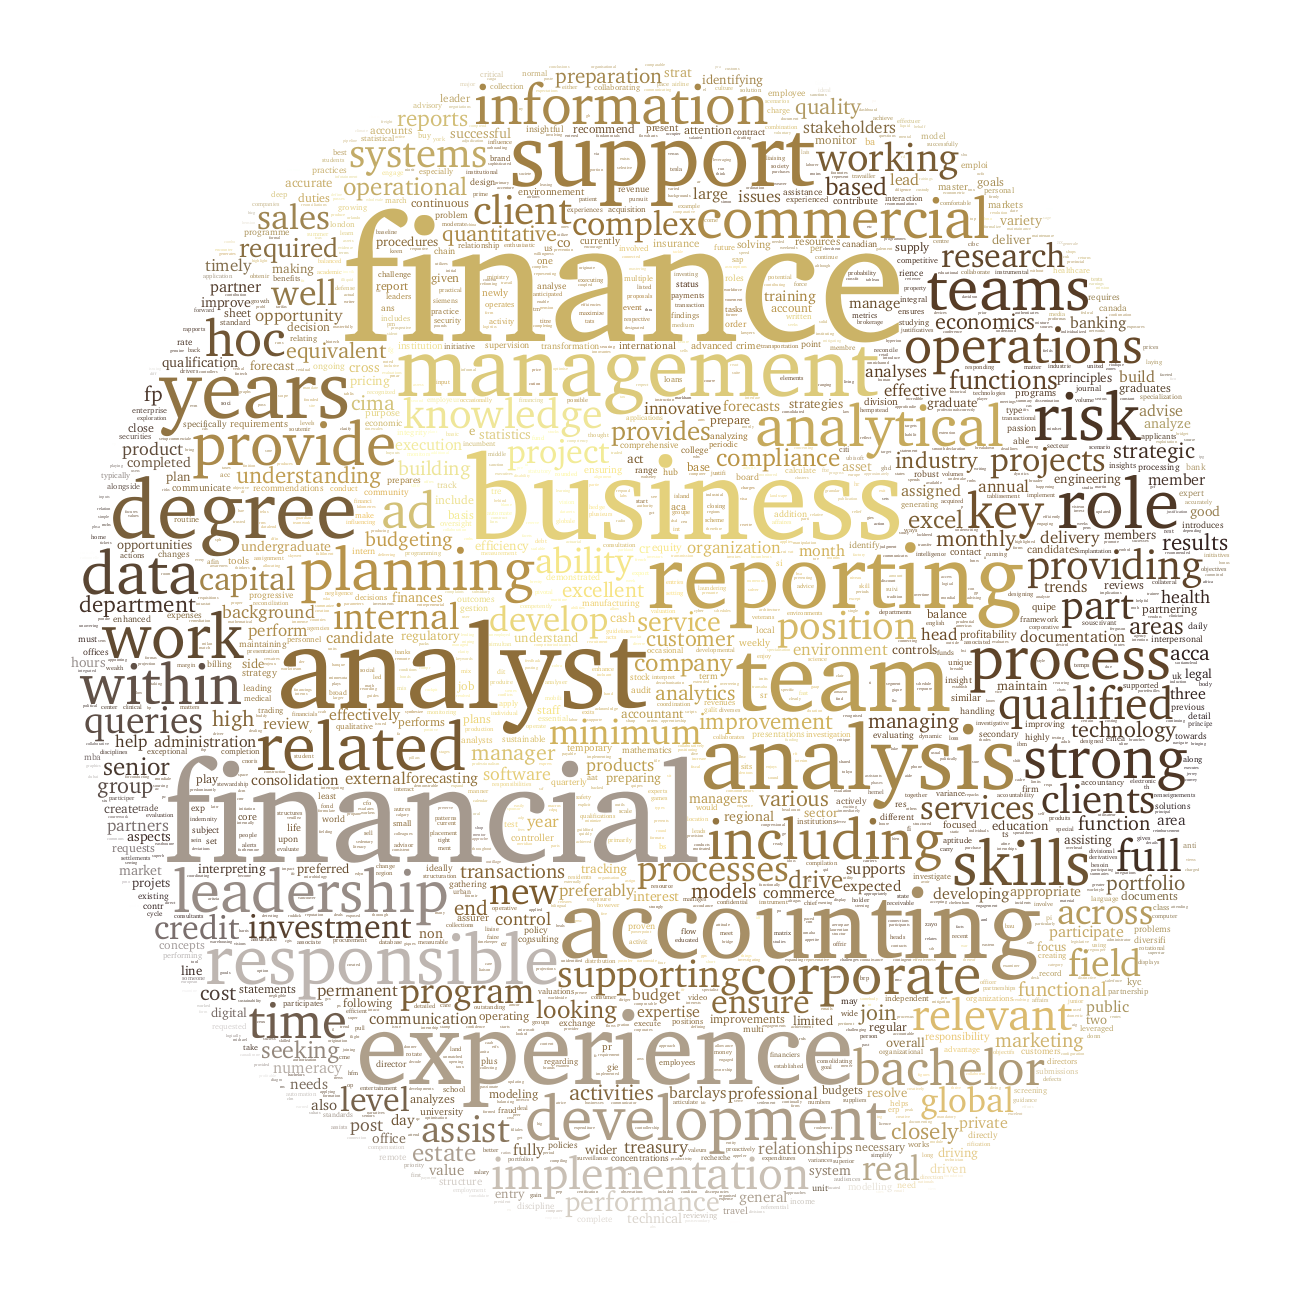

In [83]:
# Financial Analyst wordcloud
wc = WordCloud(
    font_path="../indeed-finance//Utils/Charter.ttf",
    color_func=image_colours,
    mask=mask,
    max_words=2000,
    background_color="white",
    prefer_horizontal=1,
)
# Generate the cloud using a frequency dictionary
wc.generate_from_frequencies(words_count)
wc.to_image()

In [84]:
# Counting the frequency of each word
words_count = Counter(sum_clean.Summary[str(Titles[16])])

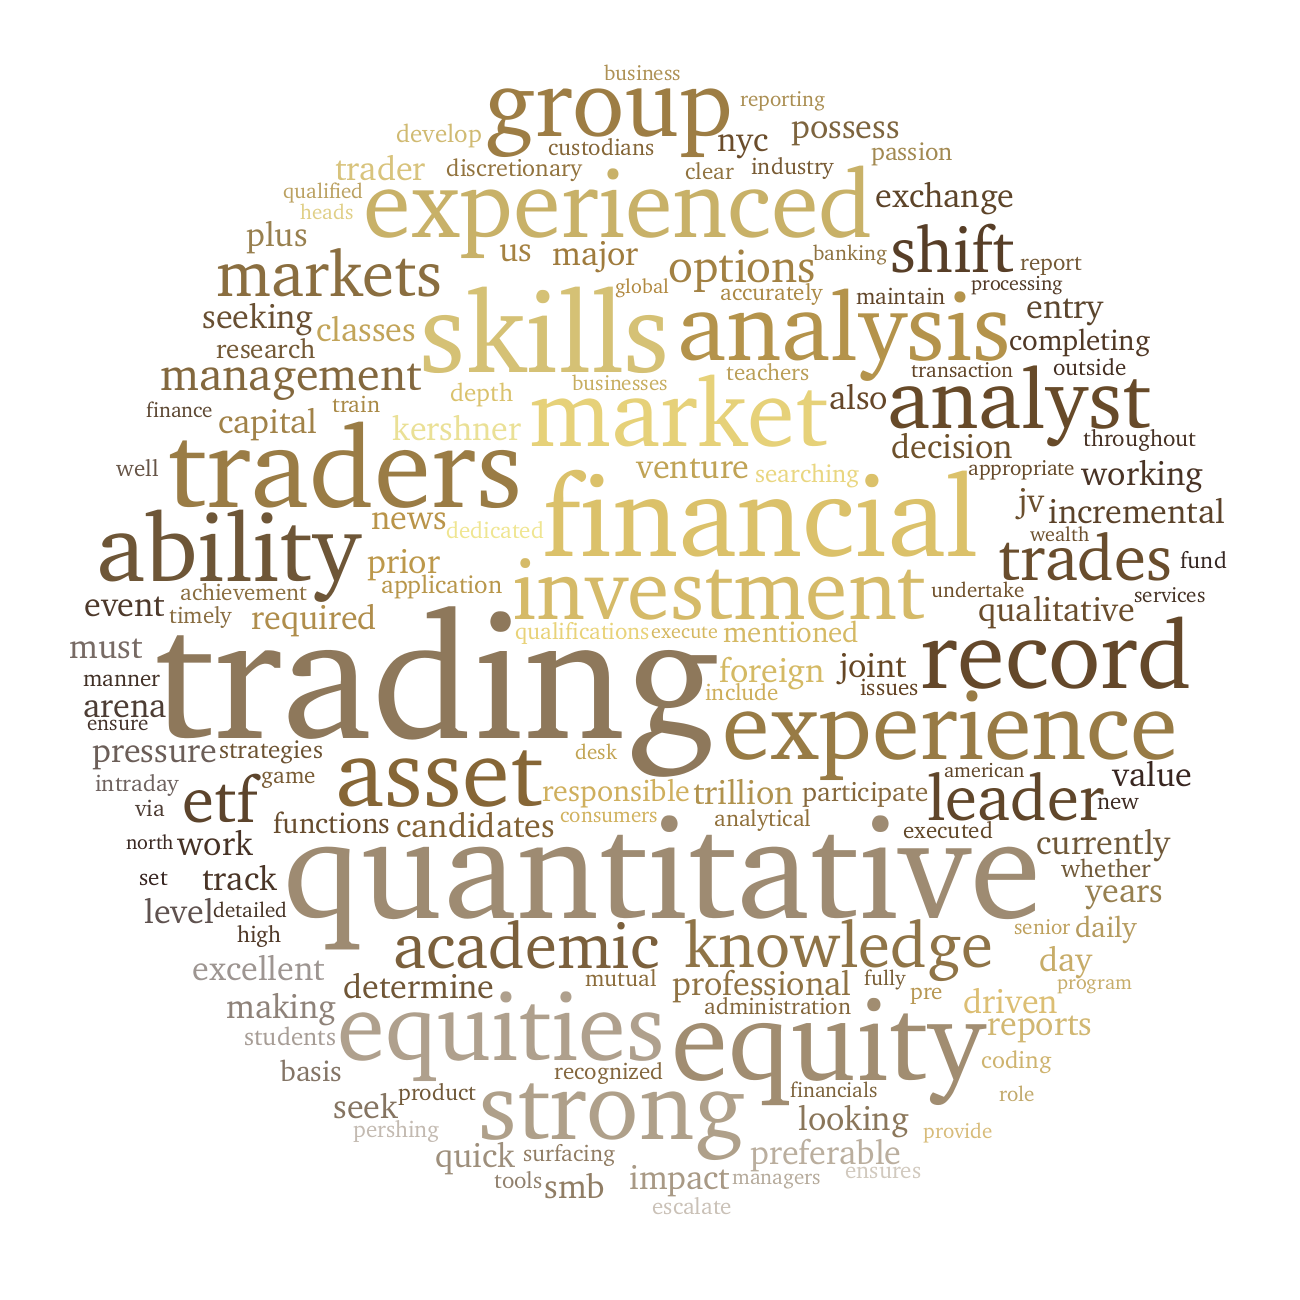

In [86]:
# Trader wordcloud
wc = WordCloud(
    font_path="../indeed-finance//Utils/Charter.ttf",
    color_func=image_colours,
    mask=mask,
    max_words=2000,
    background_color="white",
    prefer_horizontal=1,
)
# Generate the cloud using a frequency dictionary
wc.generate_from_frequencies(words_count)
wc.to_image()

In [87]:
# Counting the frequency of each word
words_count = Counter(sum_clean.Summary[str(Titles[5])])

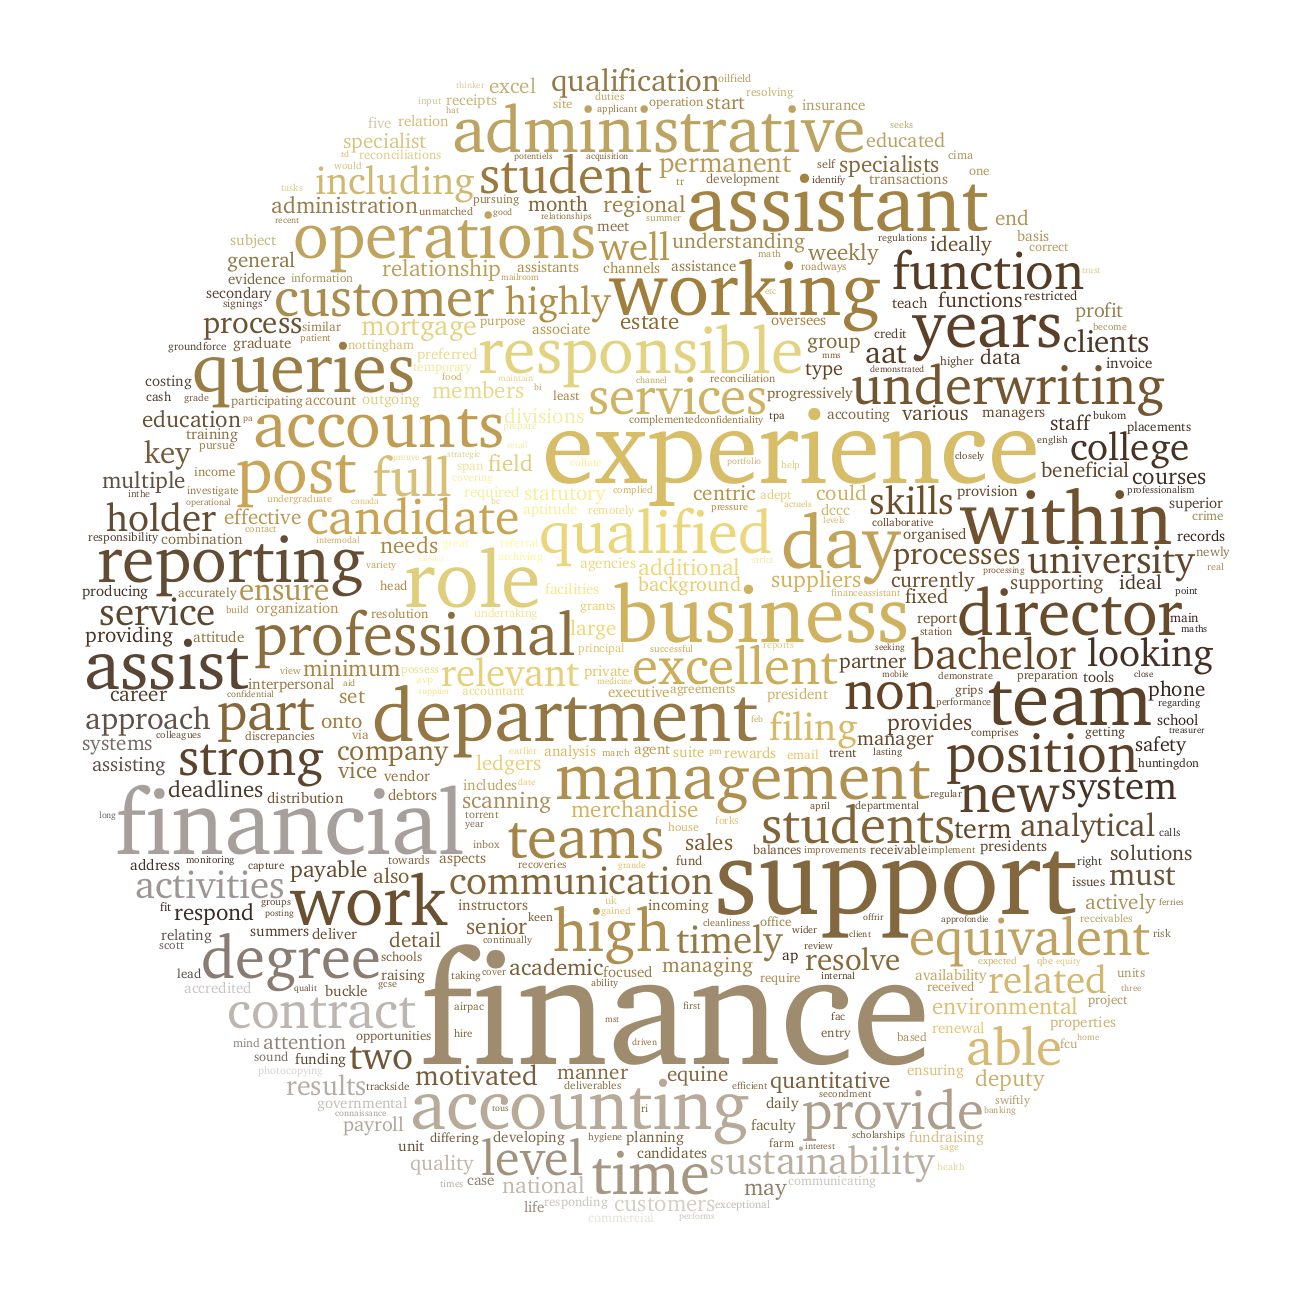

In [88]:
# Financial Assistant wordcloud
wc = WordCloud(
    font_path="../indeed-finance//Utils/Charter.ttf",
    color_func=image_colours,
    mask=mask,
    max_words=2000,
    background_color="white",
    prefer_horizontal=1,
)
# Generate the cloud using a frequency dictionary
wc.generate_from_frequencies(words_count)
wc.to_image()

### Skills

In [89]:
# Number of elements in the Financial Analyst summary
len(sum_clean.Summary[str(Titles[4])])

7831

In [90]:
# Frequency of the word 'master'
sum_clean.Summary[str(Titles[4])].count("master")

5

In [91]:
# Frequency of the word 'bachelor'
sum_clean.Summary[str(Titles[4])].count("bachelor")

25

In [92]:
# Getting all the tokens from the summaries together
all_words = []
for i in range(15):
    all_words.extend(sum_clean.Summary[str(Titles[i])])
print(str(len(all_words)))

17817


In [93]:
# Counting the frequency of each word
words_count = Counter(all_words)

In [94]:
# Determining if a string is equal to experience or degree
def expORdegr(value, col):
    if value == "experience" or value == "degree":
        return "black"
    else:
        return "grey"

In [95]:
# Frequency dataframe
sum_freq = pd.DataFrame.from_dict(words_count, orient="index").reset_index()
sum_freq.columns = ["Word", "Frequency"]
sum_freq.sort_values(by=["Frequency"], inplace=True, ascending=True)
sum_freq["Frequency"] = sum_freq["Frequency"].astype(int).apply(lambda x: f"{x:,}")
sum_freq["Colors"] = sum_freq.Word.apply(lambda x: expORdegr(x, sum_freq.Word))
sum_freq.tail(5)

,Word,Frequency,Colors
34,accounting,239,grey
66,business,250,grey
101,experience,269,black
36,financial,374,grey
27,finance,741,grey


In [96]:
# Summary frequencies chart
fig = px.bar(
    sum_freq.tail(15),
    x="Frequency",
    y="Word",
    color="Colors",
    color_discrete_sequence=["darkgrey", "black"],
    title="<b>Most common words<b>",
    orientation="h",
    text="Frequency",
    width=800,
    height=400,
)
# Remove x axes from the fig
fig.update_xaxes(visible=False, showticklabels=False)
fig.update_yaxes(
    tickfont_family="Charter", ticks="outside", tickcolor="white", ticklen=10
)
fig.update_traces(textposition="inside", textfont_size=11)

# Put the title in the middle
fig.update(layout=dict(title=dict(x=0.16, y=0.92)))
# Remove the legend and put the background in white
fig.update_layout(
    yaxis_categoryorder="total ascending",
    showlegend=False,
    plot_bgcolor="white",
    yaxis=dict(title=""),
    margin=dict(autoexpand=True, l=100, r=20, t=60, b=30),
    font=dict(family="Charter", size=13, color="Black"),
)
fig.show()